- PCA (unsupervised): finds orthogonal component axes of max variance in a dataset
- LDA (supervised) : finds feature subspace that optimizes class separability

In [1]:
import pandas as pd
import numpy as np

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'
                      'wine/wine.data', header=None)

In [2]:
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


- Columns are not named. We will do this in the next code snippet
- Has 178 instances and 13 features (high dimensional data)
- First column is target values

In [3]:
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                  'Alcalinity of ash', 'Magnesium', 'Total phenols',
                  'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                  'Color intensity', 'Hue', 'OD290/OD315 of diluted wines',
                  'Proline']
# Wines are classified into different class, encoded into numbers, based on the feautures
print("Class labels present:",np.unique(df_wine['Class label']))

Class labels present: [1 2 3]


In [4]:
from sklearn.model_selection import train_test_split

# Unpack the dataset as NumPy array (values will do that )
X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y,\
                                                   random_state=0)

# Standardize 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
# Do a fit and transform both at the same time using fit_transform
# fit will find the parameters needed for standardization
# transform will transform the data into a standardized form
X_train_std = sc.fit_transform(X_train)
# You need not fit again because it has already been done above
X_test_std = sc.transform(X_test)

In [7]:
# Calculate a scatter matrix 
mean_vecs = []

# Run it over all labels (1,2,3)
for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))
    print("MV %s: %s\n"%(label, mean_vecs[label-1]))


MV 1: [ 0.9065826  -0.34973457  0.32010329 -0.71891449  0.50558678  0.88069702
  0.95894709 -0.55161049  0.54159322  0.23383109  0.58971299  0.65631399
  1.20749382]

MV 2: [-0.87487963 -0.28480003 -0.37347228  0.31571225 -0.38480347 -0.04332505
  0.06345321 -0.09460613  0.07034749 -0.82860474  0.31436962  0.36084258
 -0.72528643]

MV 3: [ 0.199215    0.8660339   0.168163    0.41484489 -0.04511771 -1.02855532
 -1.28756034  0.82867687 -0.77947565  0.96494432 -1.20899133 -1.36215159
 -0.40130076]



In [14]:
#dimension of the feature space
d = np.shape(X_train_std)[1]
print("Dimension of the feature space: ", d)
# Initialize the scatter matrices
S_W = np.zeros((d,d))

for label, mv in zip(range(1,4),mean_vecs):
    class_scatter = np.zeros((d,d))
for row in X_train_std[y_train == label]:
    row, mv = row.reshape(d,1), mv.reshape(d,1)
    class_scatter += (row-mv).dot((row-mv).T)
    S_W += class_scatter
print("Within class scatter matrix: %sx%s"%(S_W.shape[0],S_W.shape[1]))


Dimension of the feature space:  13
Within class scatter matrix: 13x13


__Let us create a plot for the separating hyperplane/ decision boundary__

In [18]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt 

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('x','s','o','v','^')
    colors = ('red','blue','green','violet','cyan')
    #Create a colormap out of listed colors
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #Plot decision surface
    x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                           np.arange(x2_min,x2_max,resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1,xx2,Z,alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    # Plot examples by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],
                    y=X[y==cl,1],
                   alpha = 0.7, color=cmap(idx),
                   marker=markers[idx],
                   label=cl)
    

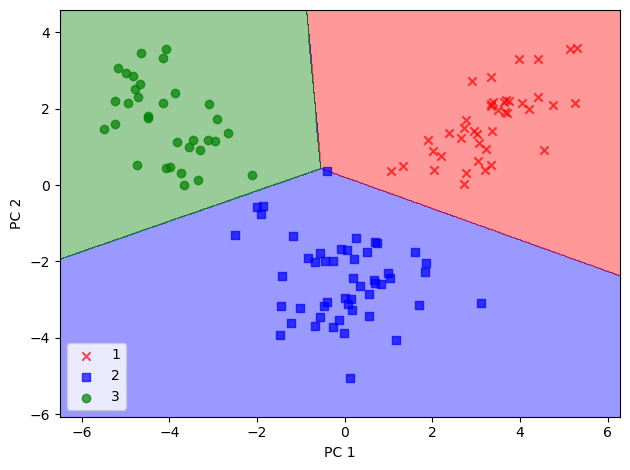

In [26]:
from sklearn.linear_model import LogisticRegression

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Initialize PCA transformer and LogisticRegression estimator
lda = LDA(n_components = 2)
lr = LogisticRegression(random_state=1, solver='lbfgs', multi_class='ovr')#, C = 0.01)

# Reduce the dimension of the feature matrix
X_train_lda = lda.fit_transform(X_train_std, y_train)

# Estimate LogisticRegression fit parameters
lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In order to check how the model performs on the test dataset, we can plot the decision regions of the logistic regression on the tranformed test dataset
    

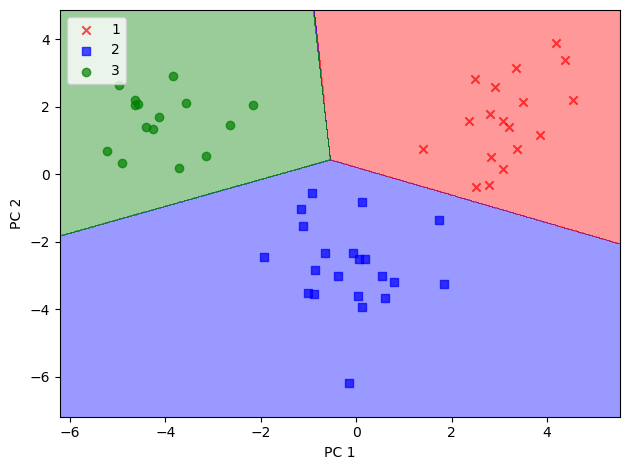

In [27]:
X_test_lda = lda.transform(X_test_std)

plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc='best')
plt.tight_layout()
plt.show()